In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pytest

In [2]:
np.random.seed(42)

In [3]:
xs1 = np.linspace(0, 10, 100)
ys1 = xs1 + np.random.random(100) * 2 - 1
with open("dataset1.csv", "w") as f:
    f.write("x,y\n")
    for x, y in zip(xs1, ys1):
        f.write(f"{x},{y}\n")

In [4]:
xs2 = np.linspace(0, 10, 100)
ys2 = 2 * xs2 + np.random.random(100) * 3 - 1.5
with open("dataset2.csv", "w") as f:
    f.write("x,y\n")
    for x, y in zip(xs2, ys2):
        f.write(f"{x},{y}\n")

In [5]:
xs3 = np.linspace(0, 10, 100)
ys3 = -xs3 + np.random.random(100) * 1.5 - 0.75
with open("dataset3.csv", "w") as f:
    f.write("x,y\n")
    for x, y in zip(xs3, ys3):
        f.write(f"{x},{y}\n")

In [6]:
model = LinearRegression()

In [7]:
train_data = pd.read_csv("dataset1.csv")
X_train = train_data["x"].values.reshape(-1, 1)
y_train = train_data["y"].values

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
predictions = model.predict(X_train)

In [10]:
mse = mean_squared_error(y_train, predictions)
print(f"Mean Squared Error on Dataset 1: {mse}")

Mean Squared Error on Dataset 1: 0.35031699443558595


In [11]:
xs_noisy = np.linspace(0, 10, 100)
ys_noisy = xs_noisy + np.random.random(100) * 2 - 1
ys_noisy[25:45] *= 2  # Добавление шума
with open("dataset_noisy.csv", "w") as f:
    f.write("x,y\n")
    for x, y in zip(xs_noisy, ys_noisy):
        f.write(f"{x},{y}\n")

Text(0.5, 1.0, 'Dataset 1 and Model')

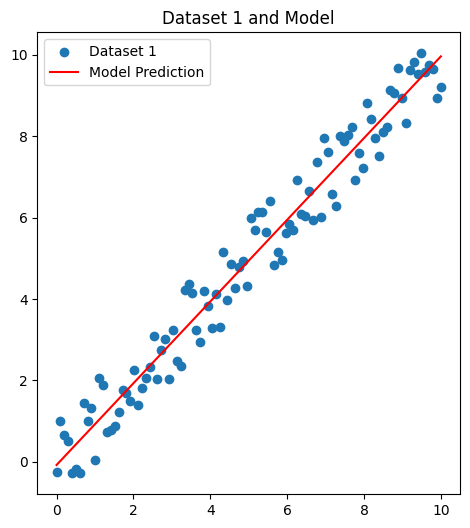

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(xs1, ys1, label="Dataset 1")
plt.plot(xs1, predictions, color="red", label="Model Prediction")
plt.legend()
plt.title("Dataset 1 and Model")

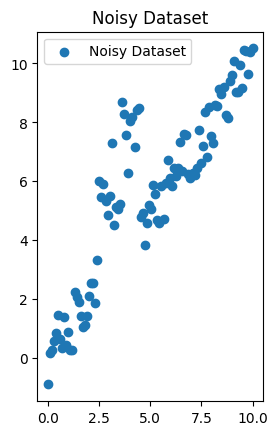

In [13]:
plt.subplot(1, 2, 2)
plt.scatter(xs_noisy, ys_noisy, label="Noisy Dataset")
plt.legend()
plt.title("Noisy Dataset")
plt.show()

In [14]:
def test_model_on_clean_data():
    clean_data = pd.read_csv("dataset1.csv")
    predictions_clean = model.predict(clean_data["x"].values.reshape(-1, 1))
    mse_clean = mean_squared_error(clean_data["y"].values, predictions_clean)
    assert mse_clean < 1.0, "MSE на чистом датасете должно быть меньше 1.0"

In [15]:
def test_model_on_noisy_data():
    noisy_data = pd.read_csv("dataset_noisy.csv")
    predictions_noisy = model.predict(noisy_data["x"].values.reshape(-1, 1))
    mse_noisy = mean_squared_error(noisy_data["y"].values, predictions_noisy)
    assert mse_noisy > 1.0, "MSE на шумном датасете должно быть больше 1.0"

In [16]:
pytest.main(["-v", "-s"])

============================= test session starts ==============================
platform linux -- Python 3.12.3, pytest-8.3.4, pluggy-1.5.0 -- /home/odds/Документы/jupTask/venv/bin/python3
cachedir: .pytest_cache
rootdir: /home/odds/Документы/jupTask
plugins: anyio-4.7.0
collected 8 items. 

PASSEDmodel_training 
PASSEDmodel_on_clean_data 
PASSEDmodel_on_noisy_data 
PASSEDpredictions_size[dataset1.csv] 
PASSEDpredictions_size[dataset_noisy.csv] 
PASSEDmodel_coefficient[1.0] 
PASSEDmodel_coefficient[2.0] 
PASSEDmodel_coefficient[-1.0] 

============================== 8 passed in 0.08s ===============================


<ExitCode.OK: 0>